Available columns in your dataset:
Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')


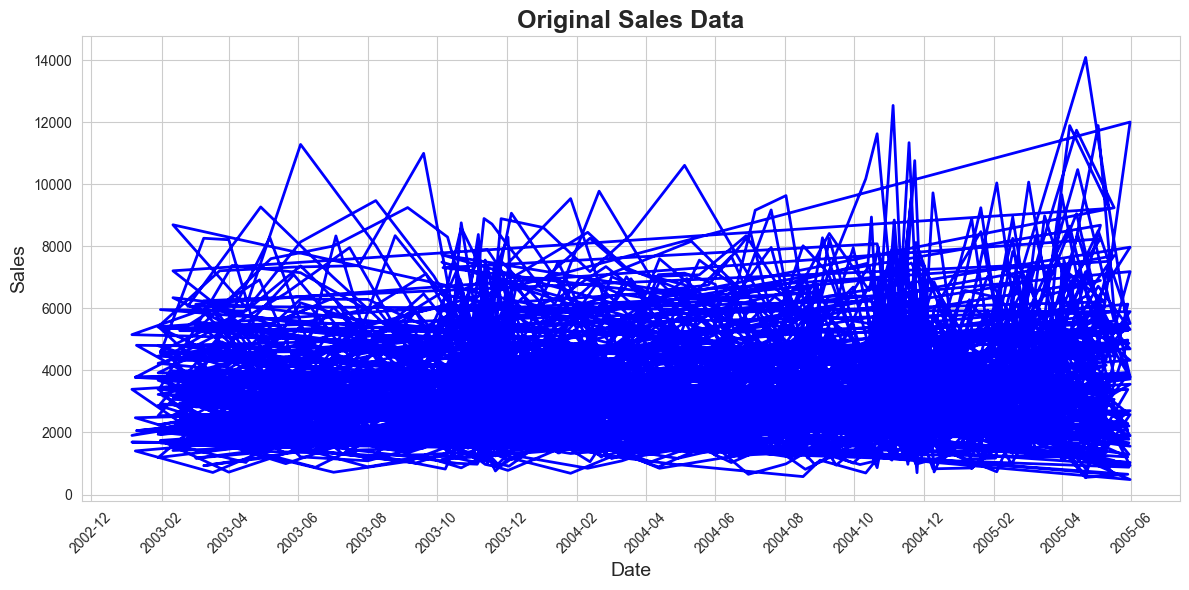

21:02:14 - cmdstanpy - INFO - Chain [1] start processing
21:02:15 - cmdstanpy - INFO - Chain [1] done processing


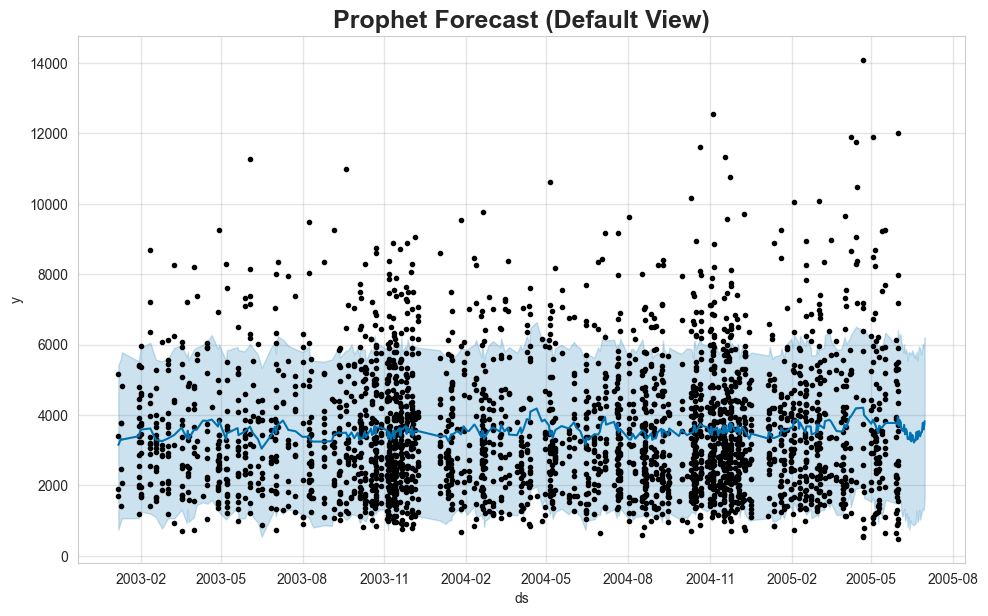

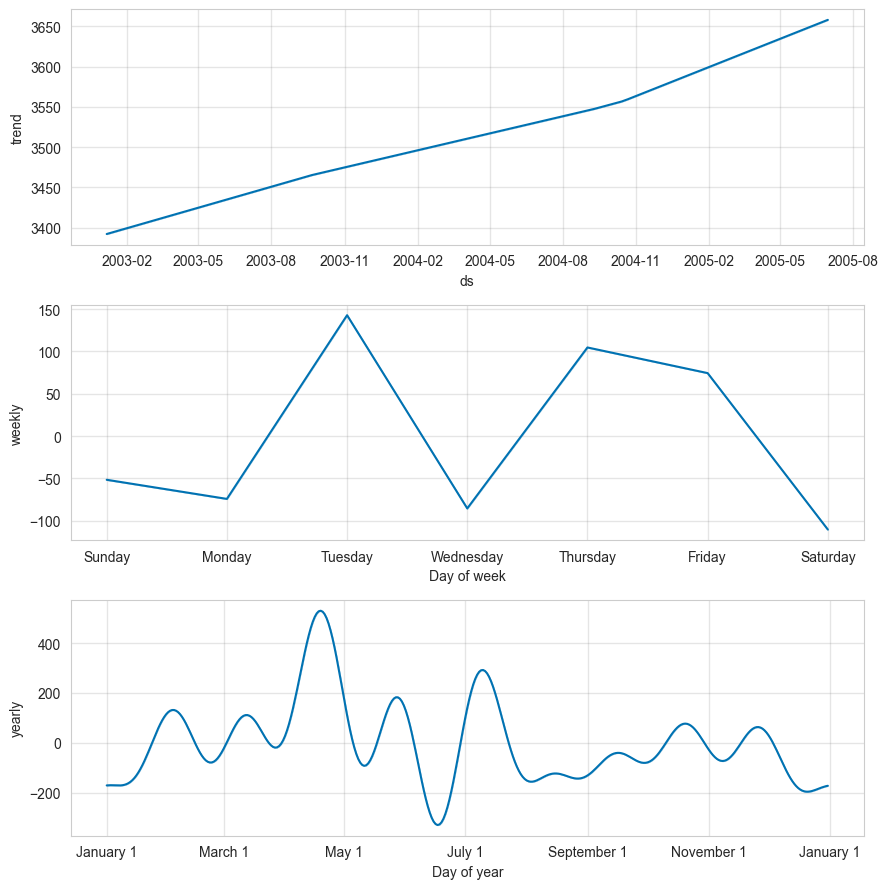


Model Evaluation Metrics:
MAE: 1392.25, MSE: 2263166.72

Forecast results saved to 'sales_forecast_output.csv'


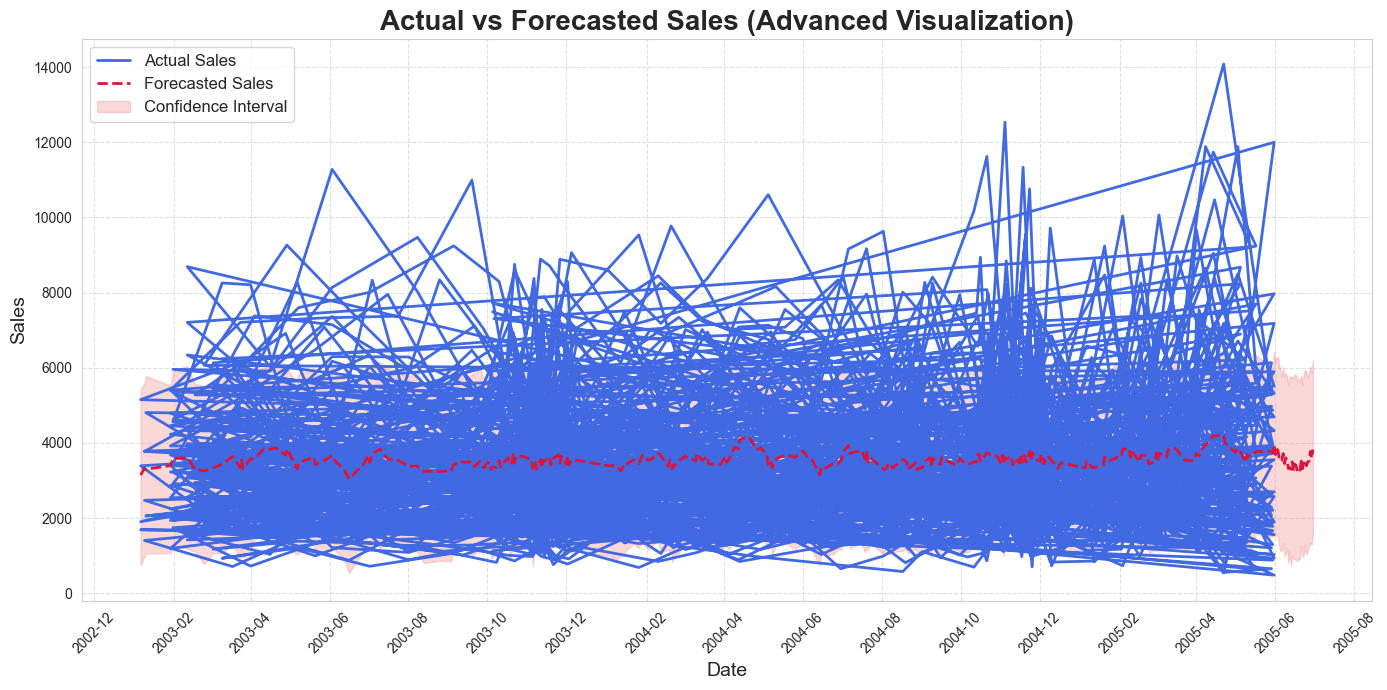

In [16]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Set Seaborn style
sns.set_style("whitegrid")

# Step 2: Load your dataset (handling encoding issue)
data = pd.read_csv('D:\\Future Intern\\Task-1\\sales_data_sample.csv', encoding='latin1')

# Step 3: Check column names
print("Available columns in your dataset:")
print(data.columns)

# Step 4: Rename correct columns for Prophet
data.rename(columns={'ORDERDATE': 'ds', 'SALES': 'y'}, inplace=True)

# Step 5: Ensure 'ds' column is datetime
data['ds'] = pd.to_datetime(data['ds'])

# Step 6: Visualize your original data
plt.figure(figsize=(12, 6))
plt.plot(data['ds'], data['y'], color='blue', linewidth=2)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.title('Original Sales Data', fontsize=18, fontweight='bold')
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 7: Train the Prophet model
model = Prophet()
model.fit(data)

# Step 8: Create a future dataframe
future = model.make_future_dataframe(periods=30)  # Forecast next 30 days
forecast = model.predict(future)

# Step 9: Prophet default forecast plot (optional)
fig1 = model.plot(forecast)
plt.title('Prophet Forecast (Default View)', fontsize=18, fontweight='bold')
plt.show()

# Step 10: Prophet forecast components plot
fig2 = model.plot_components(forecast)
plt.show()

# Step 11: Model Evaluation
try:
    y_true = data['y'][-30:]
    y_pred = forecast['yhat'][-30:]

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    print(f"\nModel Evaluation Metrics:\nMAE: {mae:.2f}, MSE: {mse:.2f}")
except Exception as e:
    print("Evaluation skipped (not enough data or mismatch).", e)

# Step 12: Save forecast to CSV
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('D:\\Future Intern\\Task-1\\sales_forecast_output.csv', index=False)
print("\nForecast results saved to 'sales_forecast_output.csv'")

# Step 13: Professional Custom Matplotlib + Seaborn forecast graph
plt.figure(figsize=(14, 7))
plt.plot(data['ds'], data['y'], label='Actual Sales', color='royalblue', linewidth=2)
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Sales', color='crimson', linestyle='--', linewidth=2)
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='lightcoral', alpha=0.3, label='Confidence Interval')

plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.title('Actual vs Forecasted Sales (Advanced Visualization)', fontsize=20, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
